In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic
import logisticop 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


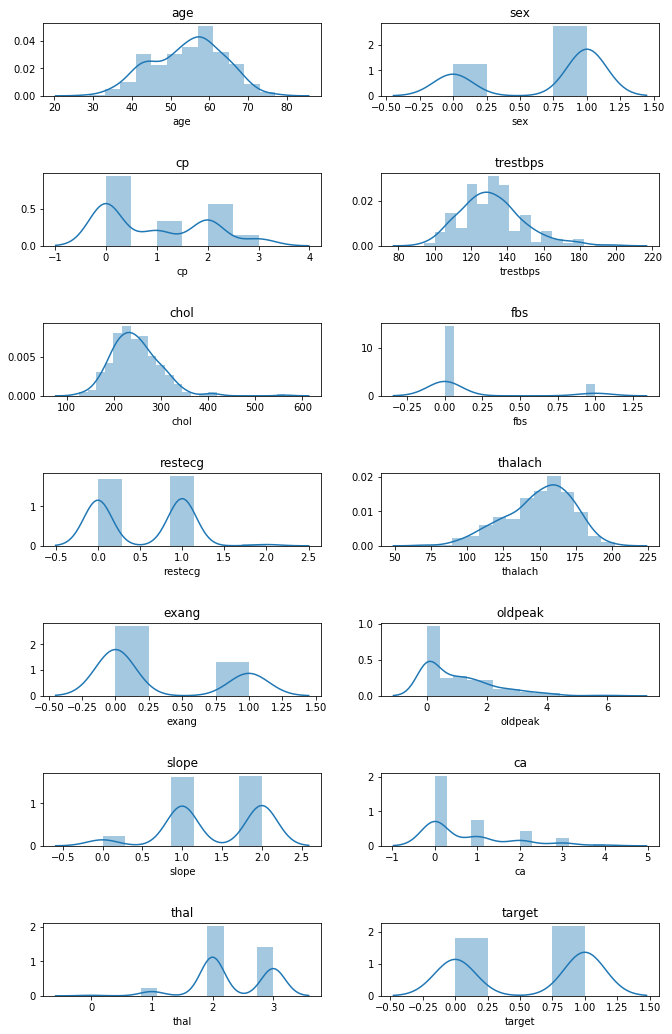

In [5]:
def distribution(data):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

distribution(data)

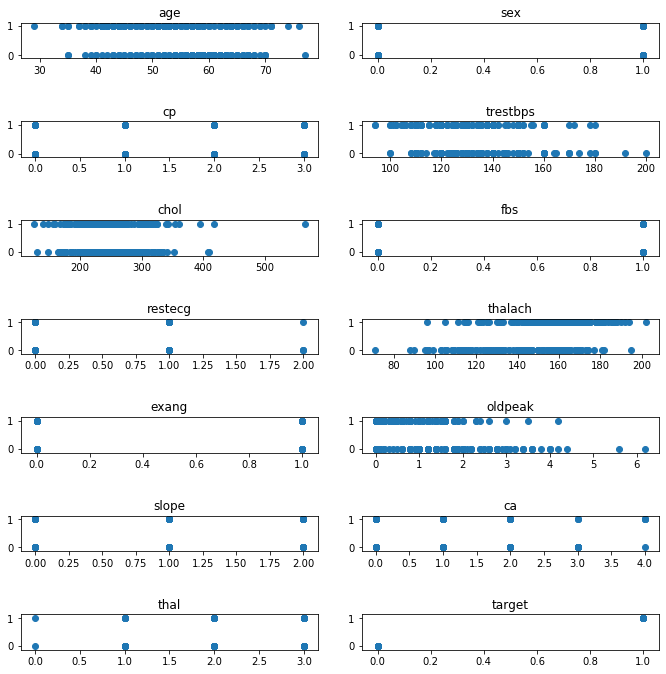

In [6]:
correlations(data, 'target')

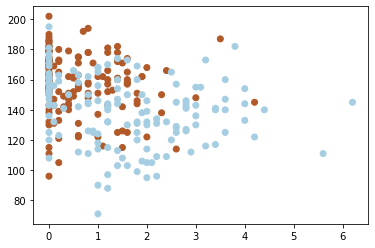

In [7]:
plt.scatter(data['oldpeak'], data['thalach'], c=data['target'], cmap=plt.cm.Paired)

In [25]:
# Probar para cada variable 

def prueba_simple(equis, ye, thetas, variable):
    thetas = np.asarray(thetas, dtype='float64').reshape(len(thetas), 1)
    limite_inferior = min(equis[variable])
    limite_superior = max(equis[variable])
    x1 = equis[variable]
    y = ye['target']
    unos = np.asarray([1 for i in range(x1.shape[0])])
    xes = np.vstack([unos, x1]).transpose()
    y = np.expand_dims(y,1)
    res = logisticop.optimize_log(xes, y, thetas)
    # Continuar a parametrizar la funcion 
    xl = np.linspace(limite_inferior - 5,limite_superior + 5,200)
    y = 1 / (1 + (np.e ** -(res[0] + xl * res[1])))
    # Grafica de resultado
    plt.scatter(equis[variable], ye['target'])
    plt.plot(xl, y)
    plt.title("Funcion Sigmoide con " + variable)
    plt.show()
    return res

In [26]:
# agregar la fila de unos tambien 
def costo_simple(variables, thetas):
    ones = np.expand_dims(np.asarray([1 for i in range(len(x_test[variables]))]), 1)
    siguiente = np.expand_dims(x_test[variables], 1)
    entrada = np.hstack([ones, siguiente])
    costo = logistic.cost(entrada, y_test, thetas)
    return costo  

In [35]:
data_partida = data.copy()
response = pd.DataFrame(data_partida['target'])
xes = data_partida.drop('target', 1)

x_train, x_test, y_train, y_test = train_test_split(xes, response, test_size=0.20, random_state=42)
resultados = []

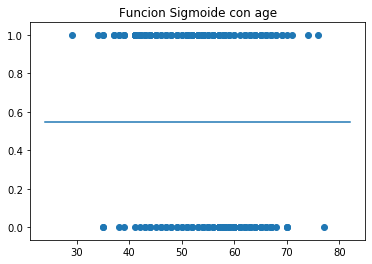

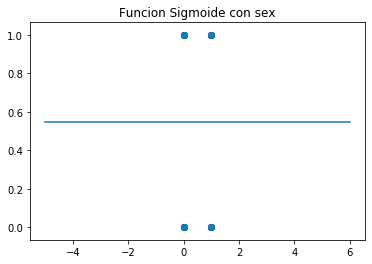

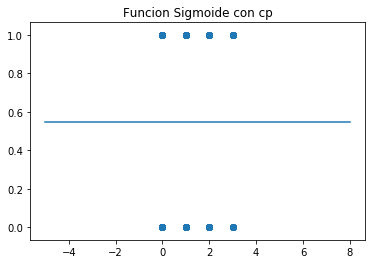

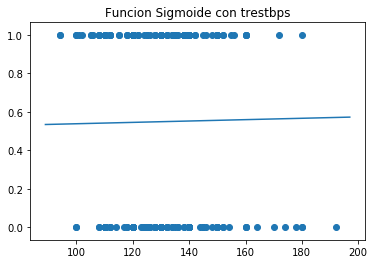

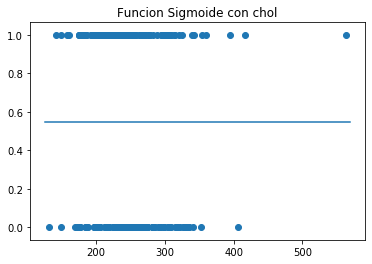

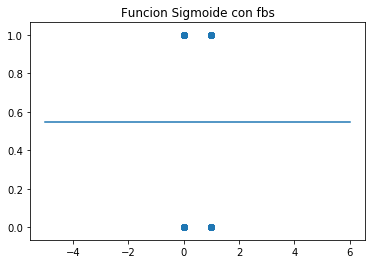

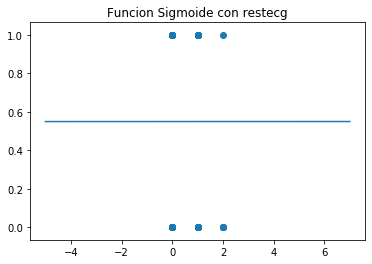

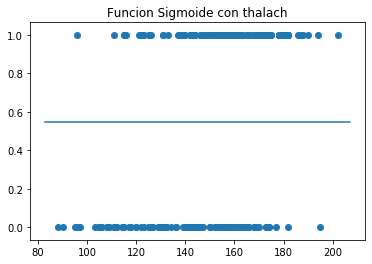

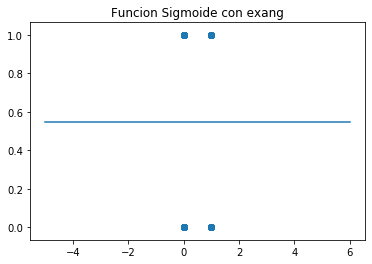

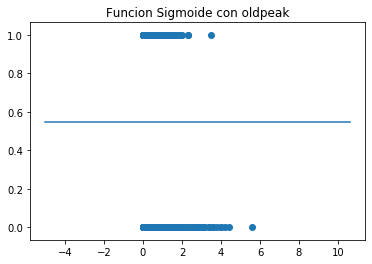

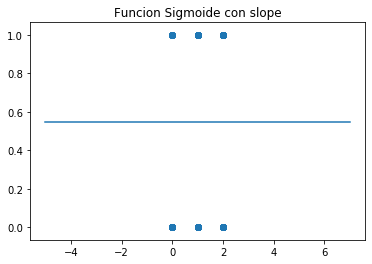

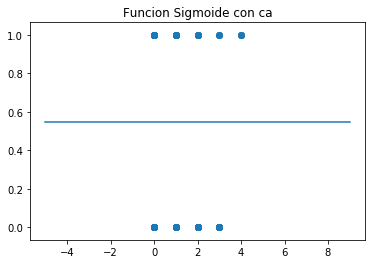

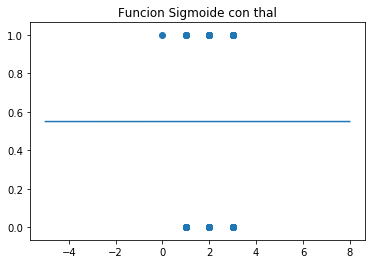

In [36]:
t = [0,0]
for i in x_test:
    res_temp = prueba_simple(x_train, y_train,t,i)
    resultados.append((costo_simple(i, res_temp)[0], res_temp, i))

In [39]:
print(sorted(resultados))

# DE AQUI YA SABEMOS QUE EN UN MODELO SIMPLE LA QUE MENOR COSTO TIENE ES RESTECG
# EN OTRAS PALABRAS el esting electrocardiographic results (values 0,1,2)

[(0.6931888133418028, array([[1.98978232e-01],
       [8.23471521e-05]]), 'restecg'), (0.6931942281532854, array([[1.98981307e-01],
       [1.23758446e-05]]), 'slope'), (0.6931953101015093, array([[1.98991049e-01],
       [6.53668142e-08]]), 'thalach'), (0.693195747624458, array([[0.19900124],
       [0.        ]]), 'ca'), (0.6931957480694753, array([[0.19900126],
       [0.        ]]), 'sex'), (0.6931957838530162, array([[1.98998159e-01],
       [5.20704345e-08]]), 'age'), (0.6931958491133545, array([[0.1990053],
       [0.       ]]), 'oldpeak'), (0.6931958699624192, array([[0.19900614],
       [0.        ]]), 'chol'), (0.6931960378675786, array([[1.98997666e-01],
       [3.48772321e-06]]), 'exang'), (0.6931962595000087, array([[1.99002014e-01],
       [1.77371497e-05]]), 'fbs'), (0.6931966375766742, array([[0.19903684],
       [0.        ]]), 'cp'), (0.6932007461347279, array([[1.98902848e-01],
       [4.08363753e-05]]), 'thal'), (0.6973348431698349, array([[0.00916047],
       [0.00

In [ ]:
# Sin embargo, solo predecir el costo puede ser misleading, por lo que voy a utilizar la confusion matrix 
